# Assignments Week III.<br><br>Filters and Sampling
<hr style="height:1px; border:none; background-color:blue;">

### Useful Information

**In this notebook you will be working on the mandatory assignments for week three of Signal Processing**. In order to complete the notebook you must complete all of the necessary code blocks (labelled with "Write your code here"), and fill in all answer blocks. Each section of the notebook will state the completion criteria, which summarize everything you need to do to complete that section. **If you are stuck on a section in this notebook, it may be beneficial to check the non-mandatory exercises for this week, since they may have content that can help you!**

Mandatory assignments are pass or fail. **If your notebook is incomplete - meaning you did not complete the task required or answer the necessary questions - then you will automatically fail.** So once you finish this notebook, please look through it to make sure you've answered everything!

Once you've completed this notebook you must go to a lab to get it graded in person.


<hr style="height:1px; border:none; background-color:blue;">

### Objectives
- Determine the minimally required sampling rate.
- Analyze the effects of over- and undersampling, and audible effects.
- Explore how different FIR filters can impact a GPS-signal.

<hr style="height:3px; border:none; background-color:blue;">

<h3 style="color:blue;"> <u>Imports for Exercises and Assignments </u></h3> 

Run the code below to import modules that will be used throughout the rest of this notebook.

<br>

In [1]:
##########################################################################################
# Import various modules into PYTHON. These will be used throughput this Jupyter Notebook
##########################################################################################
# import matplotlib for data visualisation
import matplotlib.pyplot as plt

# import NumPy for better matrix support
import numpy as np

# import Pickle for data serialisation
import pickle as pkl

# import wav for reading files
from scipy.io import wavfile as wv

# import audio for playing audio
from IPython.display import Audio, display

# add path for importing modules to './data'. 
import sys

from scipy.signal import unit_impulse

sys.path.insert(0, './data')

<hr style="height:3px; border:none; background-color:blue;">

<!---PYTHON ASSIGNMENT III.1 ---------------------------------------------------------------------->

<div>  
<h3 style="color:blue;"> <u> Python Hands-on Assignment III.1: Folding effect or aliasing</u></h3>  
    
<br>
<div style="background-color:#c2eafa">
    <br>
    <b>Completion requirements for this assignment.</b>
    <ul>
        <li>Concisely explain the audible effects and the term 'frequency folding' based on your experiences with the varying $\alpha$.</li>
    </ul>
<hr>
</div>

Consider the following time-continuous signal: 

\begin{equation}
    x(t) = \cos(8000 \pi t)
\end{equation}

**Write a function in the code block below that does the following:** produces a series of audible (sampled) signals when $x(t)$ is sampled at the frequencies $f_s = \alpha \cdot 6000 Hz$, with  successively taking the values $\alpha$ = 2; 1.85; 1.7; 1.55; 1.4; 1.25; 1.1; 0.95; 0.8; 0.65; 0.5; 0.35; and 0.2.<br><br>

</div>

SAMPLING RATE: 12000 HZ ; (ALPHA=2) - NYQUIST FREQUENCY: 8000 HZ


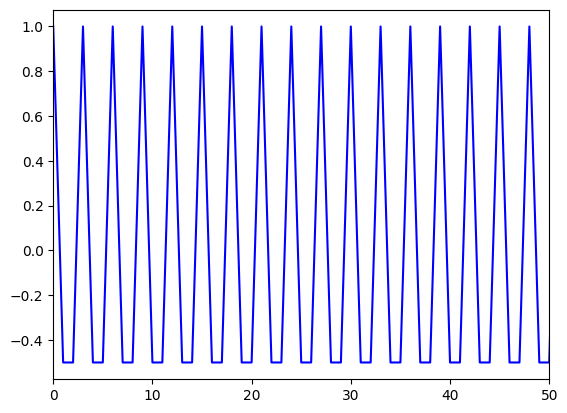

SAMPLING RATE: 11100.0 HZ ; (ALPHA=1.85) - NYQUIST FREQUENCY: 8000 HZ


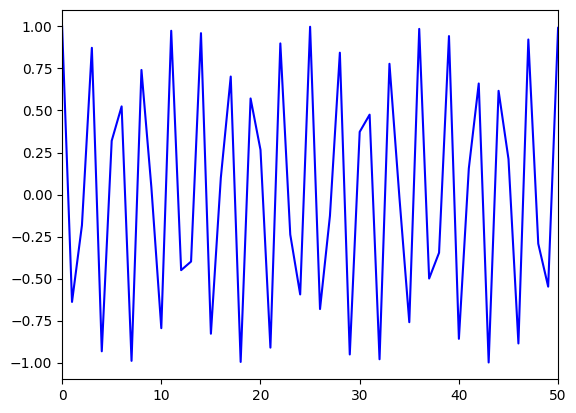

SAMPLING RATE: 10200.0 HZ ; (ALPHA=1.7) - NYQUIST FREQUENCY: 8000 HZ


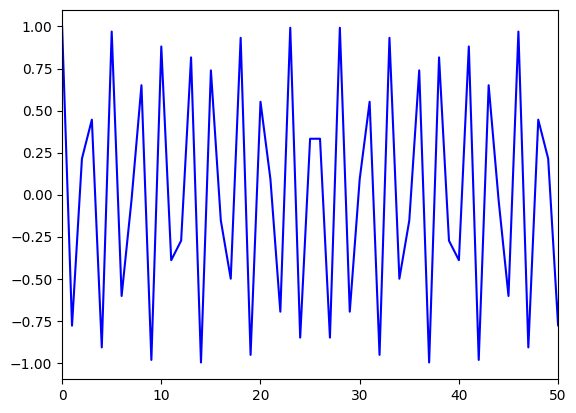

SAMPLING RATE: 9300.0 HZ ; (ALPHA=1.55) - NYQUIST FREQUENCY: 8000 HZ


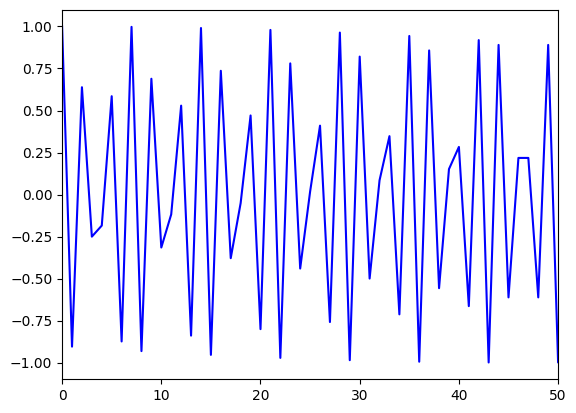

SAMPLING RATE: 8400.0 HZ ; (ALPHA=1.4) - NYQUIST FREQUENCY: 8000 HZ


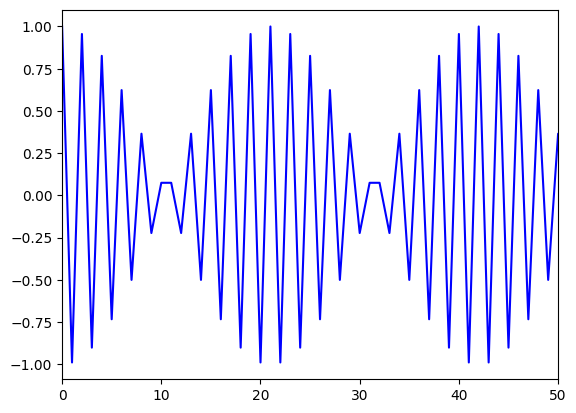

SAMPLING RATE: 7500.0 HZ ; (ALPHA=1.25) - NYQUIST FREQUENCY: 8000 HZ


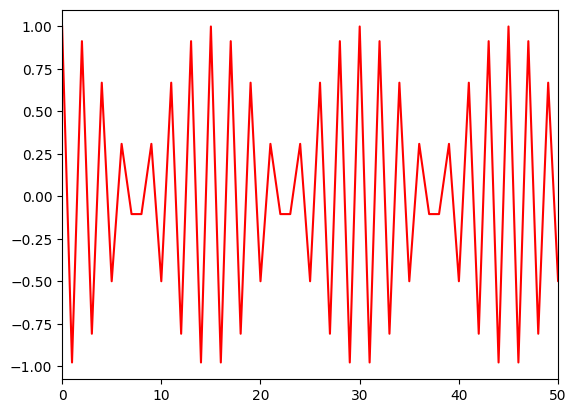

SAMPLING RATE: 6600.000000000001 HZ ; (ALPHA=1.1) - NYQUIST FREQUENCY: 8000 HZ


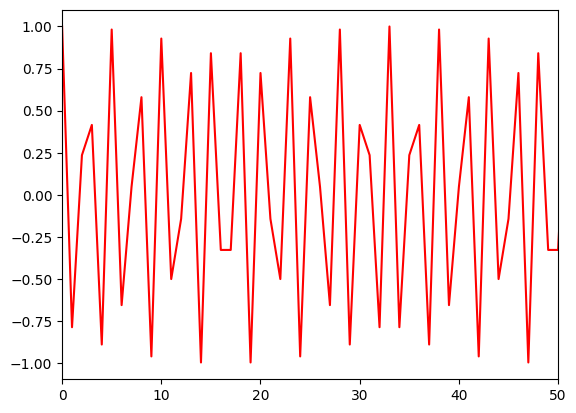

SAMPLING RATE: 5700.0 HZ ; (ALPHA=0.95) - NYQUIST FREQUENCY: 8000 HZ


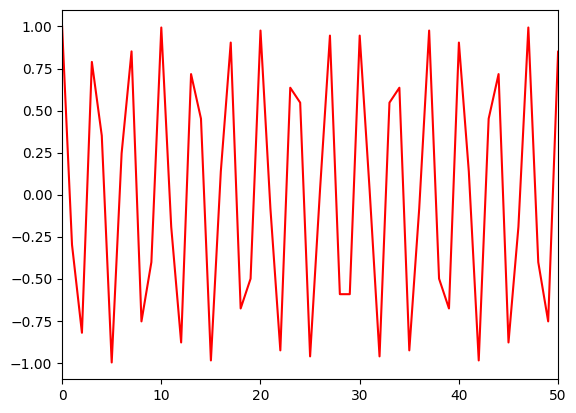

SAMPLING RATE: 4800.0 HZ ; (ALPHA=0.8) - NYQUIST FREQUENCY: 8000 HZ


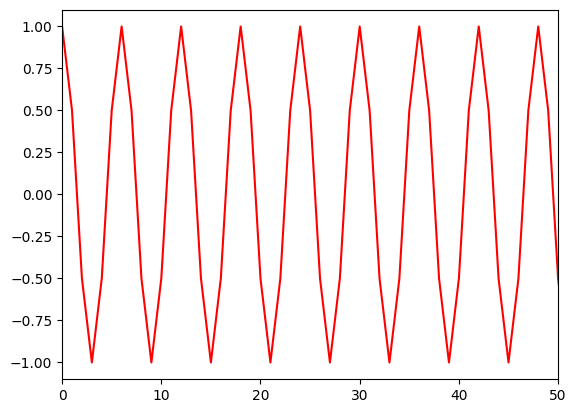

SAMPLING RATE: 3900.0 HZ ; (ALPHA=0.65) - NYQUIST FREQUENCY: 8000 HZ


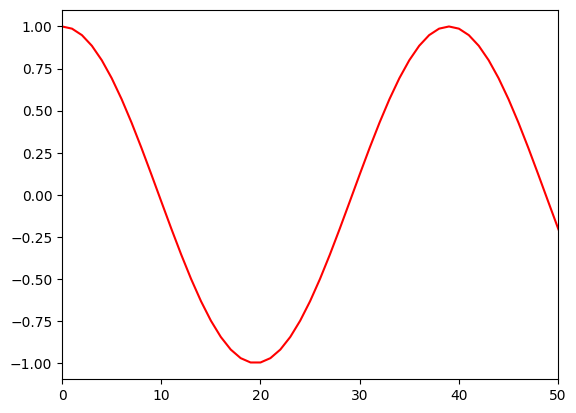

SAMPLING RATE: 3000.0 HZ ; (ALPHA=0.5) - NYQUIST FREQUENCY: 8000 HZ


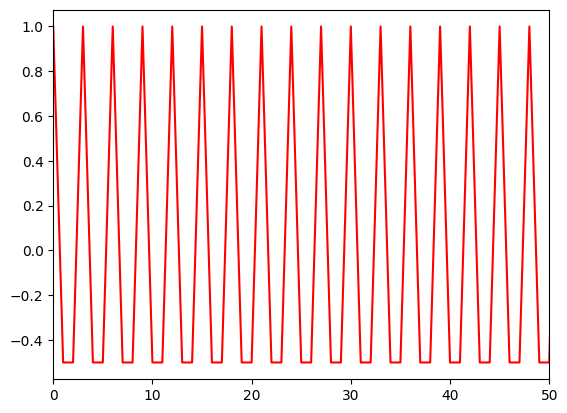

SAMPLING RATE: 2100.0 HZ ; (ALPHA=0.35) - NYQUIST FREQUENCY: 8000 HZ


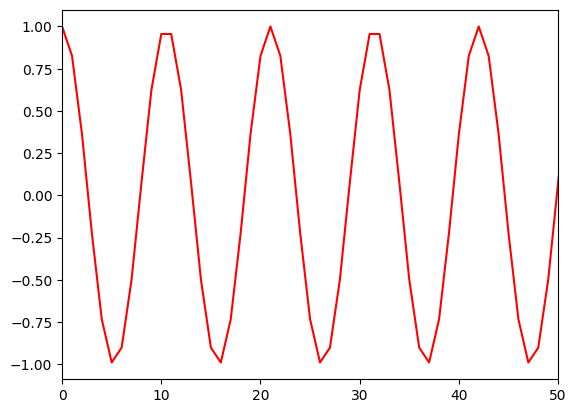

SAMPLING RATE: 1200.0 HZ ; (ALPHA=0.2) - NYQUIST FREQUENCY: 8000 HZ


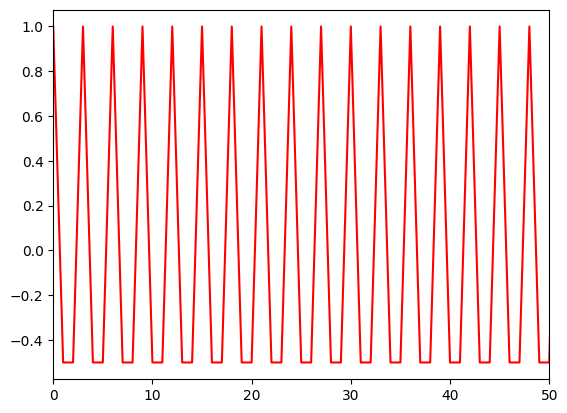

In [2]:
"""
For each sample rate keep the length of the audio clip the same.
Sample rate x hz -> x samples per second
"""

import math
from collections import defaultdict


def signal(t):
    return math.cos(8000 * math.pi * t)

# cosx = T = 2pi
# cos(pi*x) = T = 2
#  cos(2pi * x) = T = 1

SIGNAL_PERIOD = 2 * math.pi / (8000 * math.pi)
NUM_SECONDS = 5

NYQUIST_FREQUENCY = 8000

BASE_SAMPLING = 6000
ALPHAS = [2, 1.85, 1.7, 1.55, 1.4, 1.25, 1.1, 0.95, 0.8, 0.65, 0.5, 0.35, 0.2]

samples = defaultdict(lambda : [])
for alpha in ALPHAS:
    sample_rate = alpha * BASE_SAMPLING
    time_step = 1 / sample_rate
    iterations = int(NUM_SECONDS // time_step)

    for iteration in range(iterations):
        current_time_step = time_step * iteration
        samples[alpha].append(signal(current_time_step))

for alpha, values in samples.items():
    print(f"SAMPLING RATE: {BASE_SAMPLING * alpha} HZ ; (ALPHA={alpha}) - NYQUIST FREQUENCY: {NYQUIST_FREQUENCY} HZ")
    display(Audio(values, rate=alpha * BASE_SAMPLING))
    color = "blue" if (alpha * BASE_SAMPLING) >= NYQUIST_FREQUENCY else "red"
    plt.plot(values, label=alpha, color=color)
    plt.xlim(xmin=0, xmax=50)
    plt.show()


<br>

**Explain the audible effects and explain the alternative term for aliasing, namely 'frequency folding'.**

<br>

<div class="alert alert-block alert-success">
    <b>Up until dipping below Nyquist frequency of 8kHz, there is no audible difference. However, as soon as we dip below, the audio becomes progressively lower pitch. At certain sampling rates (coincidentally due to interpolation) despite an even lower sampling rate, the output signal is closer or further to the original than others.</b>
</div>

<hr style="height:3px; border:none; background-color:blue;">

<!---PYTHON ASSIGNMENT III.2 ---------------------------------------------------------------------->

<div>  
<h3 style="color:blue;"> <u>Python Hands-on Assignment III.2: Speed estimation</u></h3>  
    
<br>
<div style="background-color:#c2eafa">
<br>
    <b>Completion requirements for this assignment.</b>
    <ul>
        <li> Show the plot resulting from applying the FIR filter $s[n] = x[n] - x[n-1]$. Explain how this filter works.</li>
        <li> Explain the merit of the filter $s[n] = \frac{1}{N}(x[n] - x[n-M])$. Explain the effect of the choice of $M$, and concretely demonstrate this with three different values of $M$.</li>
        <li> Explain the merit of the filter $y[n] = \frac{1}{K + 1}\sum\limits_{k=0}^{K} x[n-k]$. Explain the effect of the choice of $K$, and concretely demonstrate this with three different choices of $K$.</li>
        <li> Show the plotted speed curve for the best choices for $K$ and $M$ in the above filters. Explain how you selected the 'best' choices.</li>
        <li> Show the plot of the impulse response of the cascaded filters.</li>
    </ul>
<hr>
</div>

You are given the signal `gpsdata.pkl`. This signal shows the x-position of a moving vehicle measured by a GPS sensor. The position is measured in meters, once per second. Unfortunately the signal is degraded due to random fluctuations and noise. **You are asked to determine the speed of the car over time.**

Read the GPS-signal into the notebook using the command `gpsposition = np.load('data/gpsdata.pkl')[0]`. The data is read into the vector `gpsposition`. **Plot the GPS position data**.<br><br>

</div>
<br>

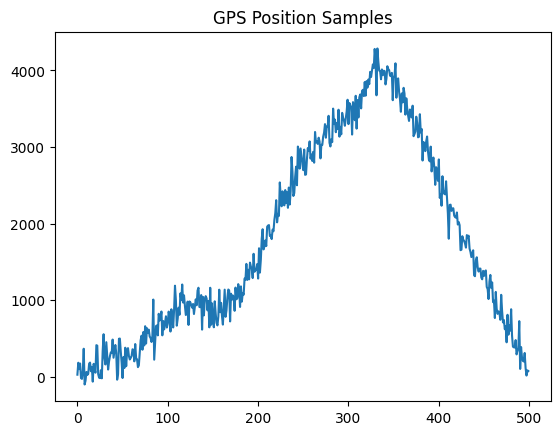

In [3]:
# UNITS: METERS
# SAMPLING RATE = 1 HZ (once per second)

gpsposition = np.load("data/gpsdata.pkl", allow_pickle=True)[0]
plt.title("GPS Position Samples")
plt.plot(gpsposition)
plt.show()

<br>

<div>
    If the GPS signal were perfect, then the speed of the car at time $n$ can simply be computed by the FIR filter
   
\begin{equation}
    s[n] = x[n] - x[n-1].
\end{equation}

**Explain why the speed can be computed using this FIR filter. What unit does the computed speed have?**</div>

<br>

<div class="alert alert-block alert-success">
    We can calculate the speed, because we have all the information. We know the time between steps (1 second), we know the units (meters), and we can obtain the distance travelled during one time step (x[n] - x[n-1]). This is actually the definition of speed: (s / t); where s = distance travelled, t = time it took.
    Because distance is in meters and time in seconds, the unit of the computed speed is meters per second (m/s)
</div>

<br>

**Implement and apply the above FIR filter to the GPS-signal and plot the result. What is your conclusion concerning the usability of this FIR filter to estimate the speed?**

<br>

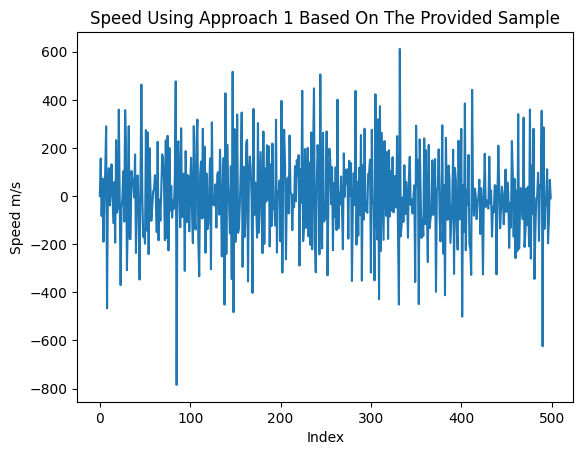

In [4]:
def speed1(xx, n, rate=1):
    return (xx[n] - xx[n-1]) / rate

yy = np.zeros(shape=gpsposition.shape[0])
for i in range(1, gpsposition.shape[0]):
    yy[i] = speed1(gpsposition, i)

plt.plot(yy)
plt.title("Speed Using Approach 1 Based On The Provided Sample")
plt.ylabel("Speed m/s")
plt.xlabel("Index")
plt.show()


<div class="alert alert-block alert-success">
  The raw signal is very noisy. It suggests that at times the vehicle went from roughly 200 to 600 m/s in one second, which is obviously impossible. It could be usable if we denoise it.
</div>

<br>

A much better estimate of the speed can be obtained by using the FIR filter:

\begin{equation}
    s[n] = \frac{1}{M}(x[n] - x[n-M])
\end{equation}

**Implement and apply this FIR filter to the GPS-signal for at least three different values of $M$. Show the resulting plots. Make sure to use the convolution operation.**

<br>

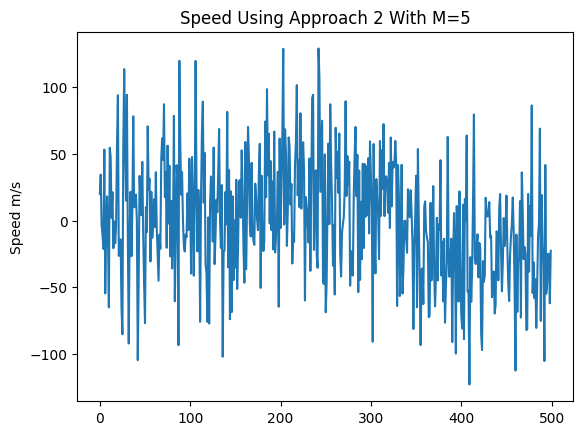

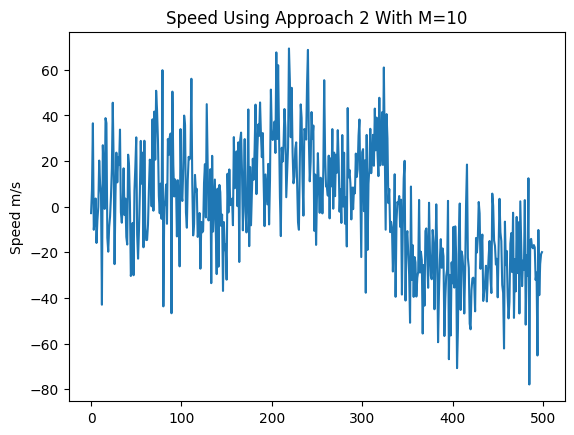

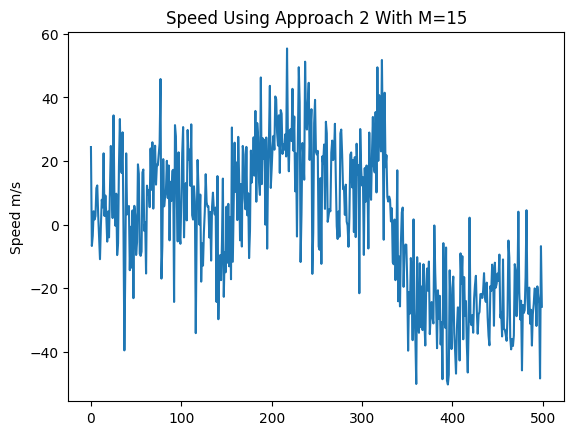

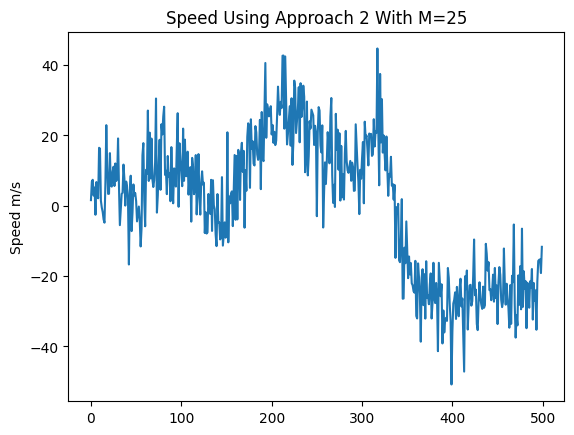

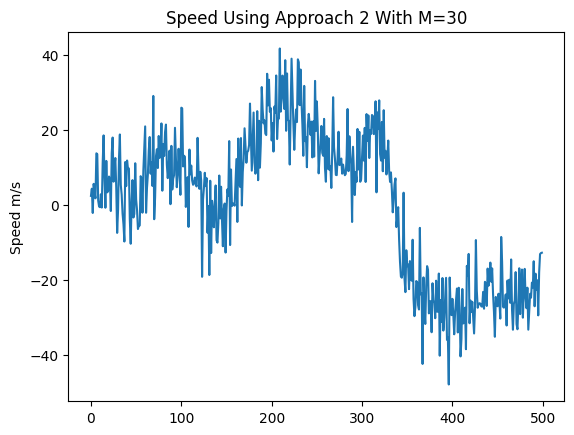

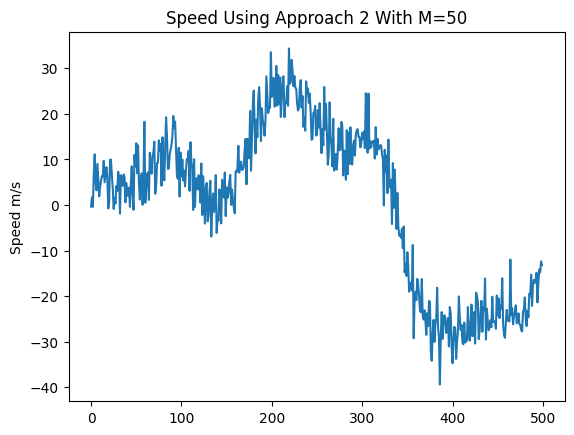

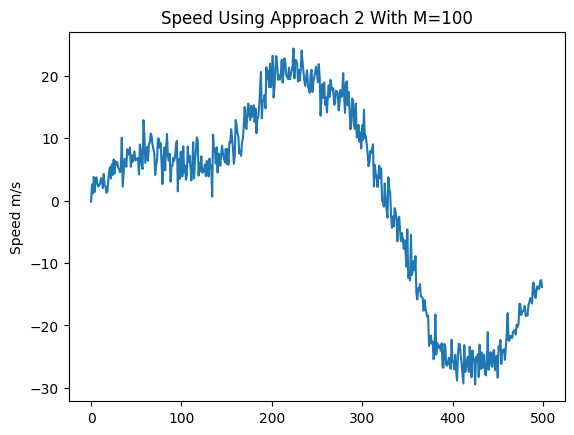

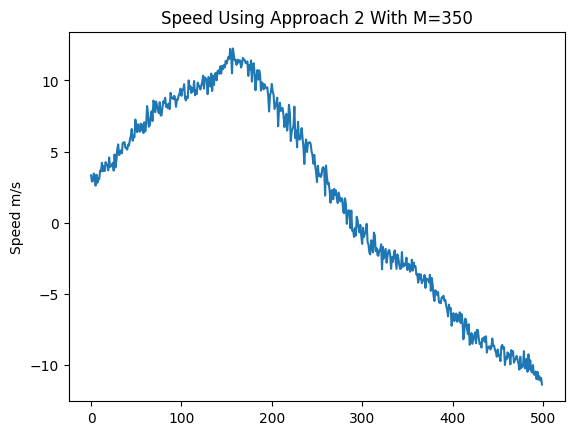

In [9]:
Ms = [5, 10, 15, 25, 30, 50, 100, 350]
for M in Ms:
    impulse_response = np.zeros(shape=M+1)
    impulse_response[0] = 1
    impulse_response[M] = -1

    yy = (1/M) * np.convolve(gpsposition, impulse_response, mode="same")

    plt.title(f"Speed Using Approach 2 With M={M}")
    plt.ylabel("Speed m/s")
    plt.plot(yy)
    plt.show()

<br>

**Please answer <i>all</i> of the following question:** Why does the filter you implemented above give a better estimate of the speed of the vehicle? What is the effect of using a small/large value of $M$? What is the best value for $M$ and why?

<br>

<div class="alert alert-block alert-success">
  The expectation of noise at each point is the same. When we're subtracting two points, the total noise is the sum of noise at each point. We're then dividing this difference by M, and so the larger the M - the less impact noise has on the final value.

  However, if we imagine the two points, spaced M units apart, as a window - the larger the window, the less sensitive we are to fluctuations in the data. This could be a good thing as we mentioned (less noise), but this also means that we are more likely to miss actual (real) fluctuations within this window.

  Best value of M is somewhere in-between, striking a balance between reducing noise and maintaining actual changes in data. We found a value of M = 50 to be the best.
</div>

<br>

Another option is to first smooth out the random fluctuations and noise before applying the above FIR filter to estimate the speed. Use the following running-average filter:

\begin{equation}
    y[n] = \frac{1}{K + 1}\sum\limits_{k=0}^{K} x[n-k]
\end{equation}

**Implement this running-average filter for different values of $K$. Use the convolution operator with the proper impulse response. Next, plot the filtered signal for at least three different values of $K$.**

<br>

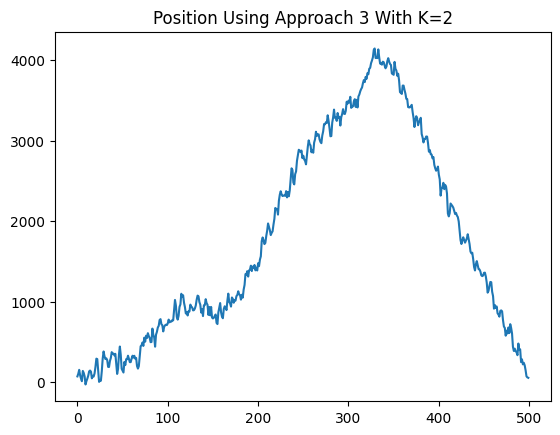

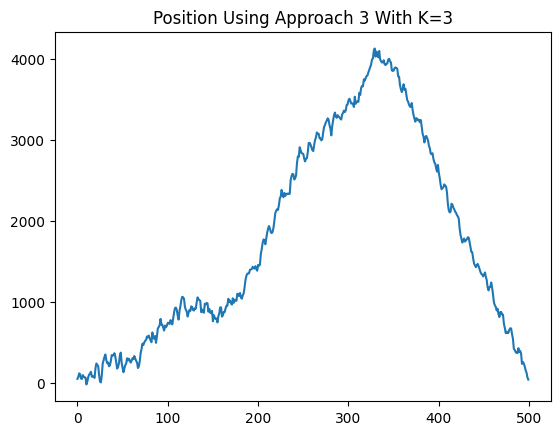

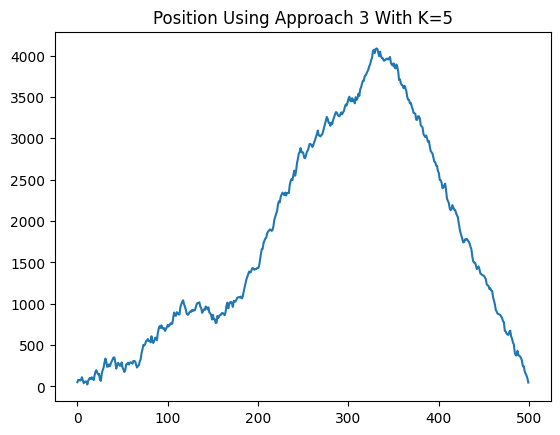

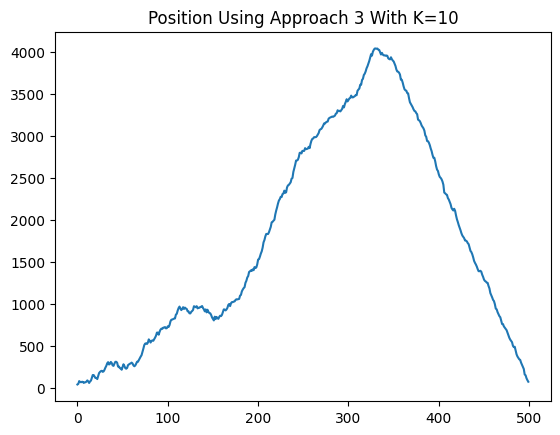

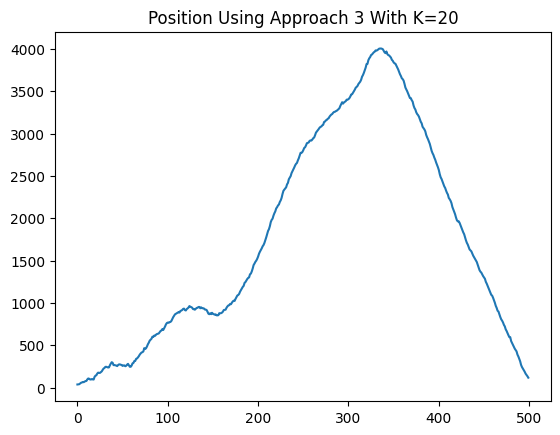

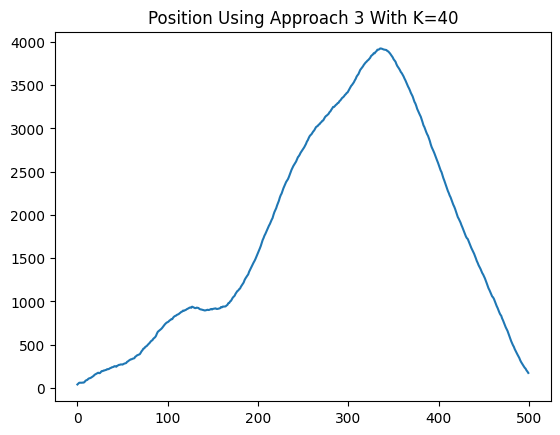

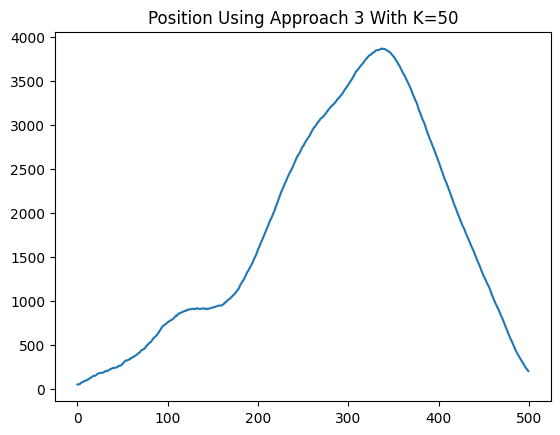

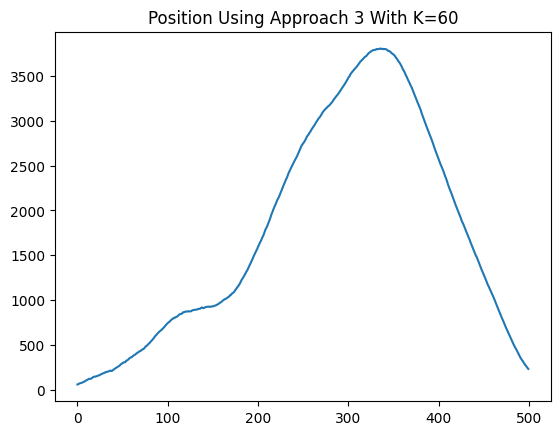

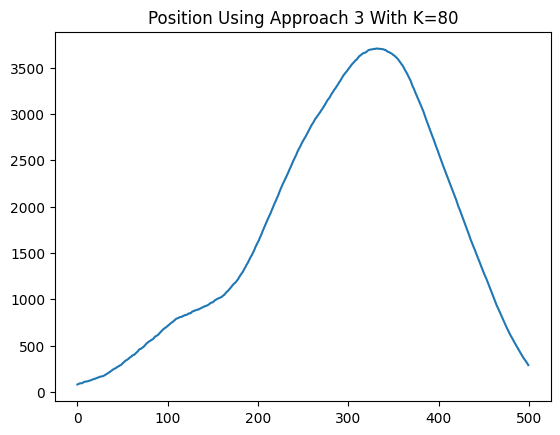

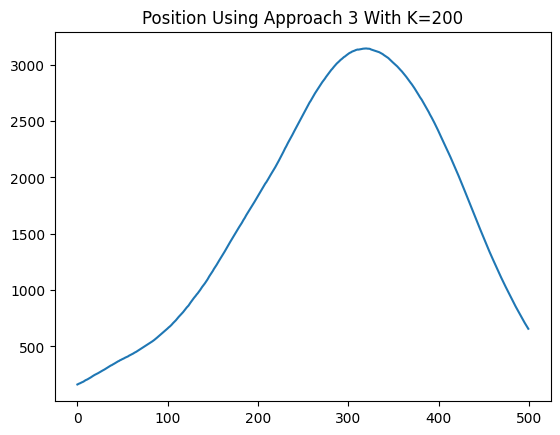

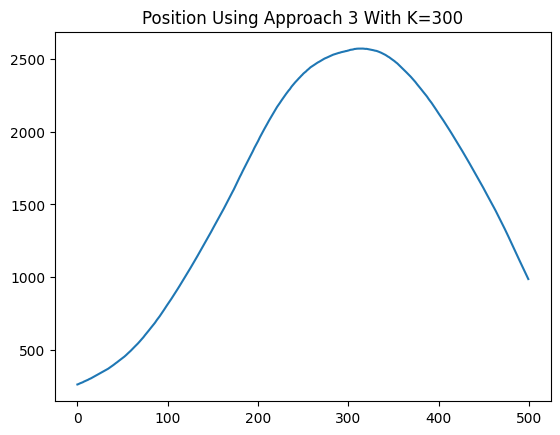

In [6]:
Ks = [2, 3, 5, 10, 20, 40, 50, 60, 80, 200, 300]
for K in Ks:
    impulse_response = np.ones(shape=K+1)
    yy = (1 / (K + 1)) * np.convolve(gpsposition, impulse_response, mode="same")

    plt.title(f"Position Using Approach 3 With K={K}")
    plt.plot(yy)
    plt.show()


<br>

**Please answer <i>all</i> of the following question:** What is the benefit of using the above filter in this context? What is the effect of using a small/large value of $K$? What is the best value for $K$ and why?

<br>

<div class="alert alert-block alert-success">
  The benefit is that it reduces the impact of noise on the values by averaging. The larger the value - the less noise impact. However, too large and the actual important fluctuations are missed.

   K = 40 seems to be the best value for K.
</div>

<br>

To estimate the vehicle's speed, the two filters can now be cascaded. The resulting input-output relation - or, if you like, the resulting impulse response - is now dependent on the values of $M$ and $K$. **Find the best values for $M$ and $K$ that allow you to estimate the different speeds of the vehicle. Filter the original GPS data in the vector $\mbox{gpsposition}$. Plot the resulting speed curve.**

<br>

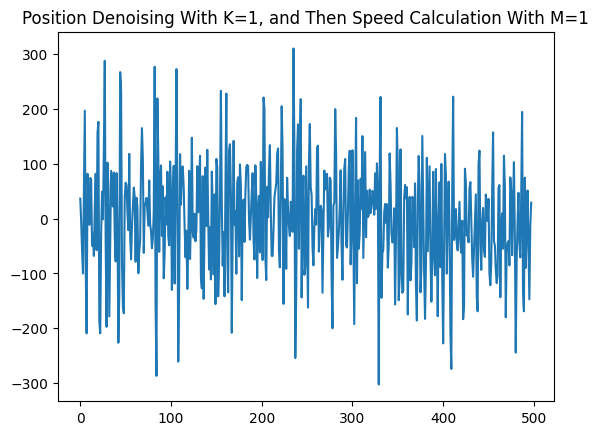

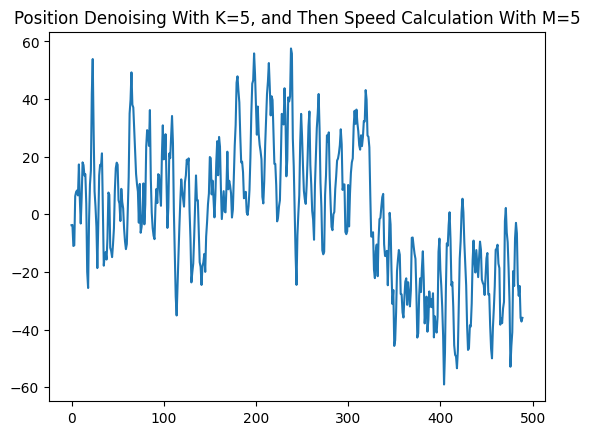

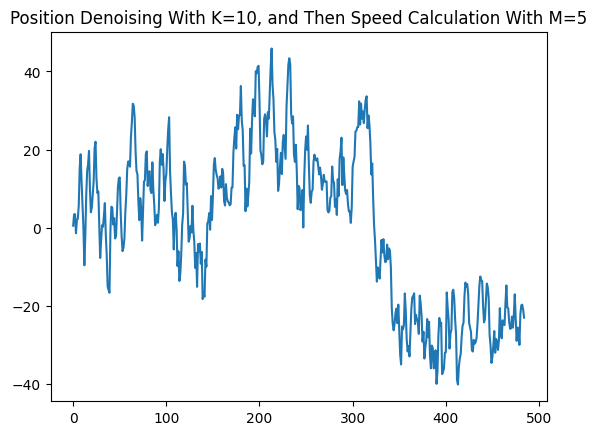

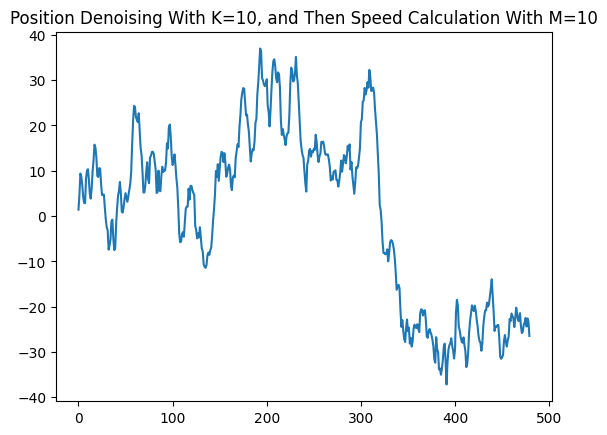

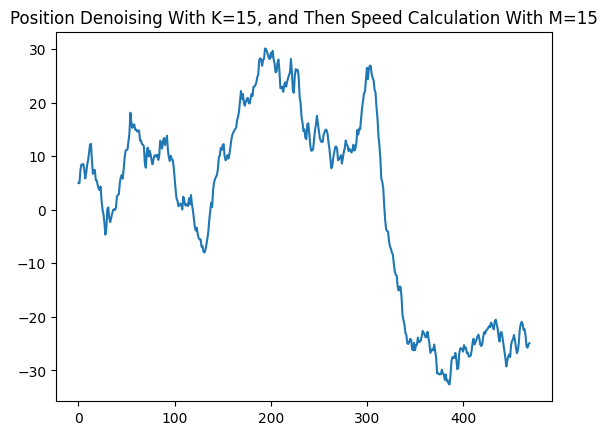

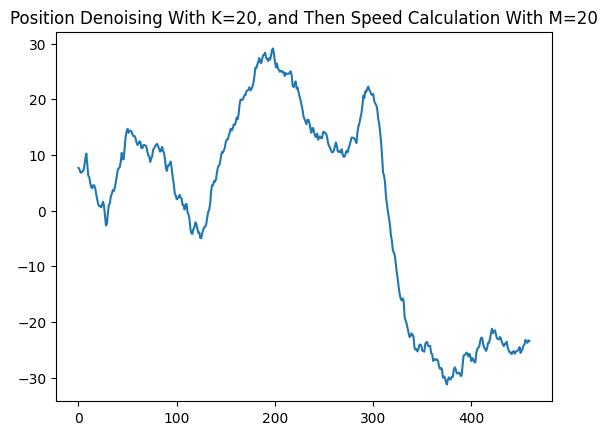

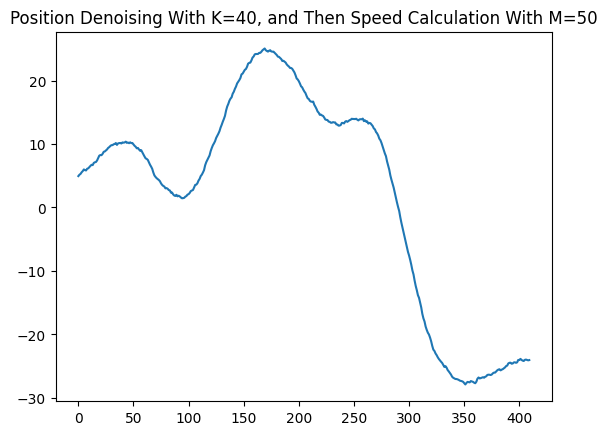

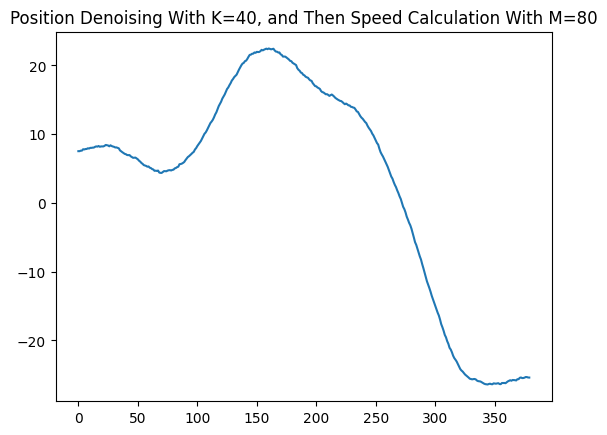

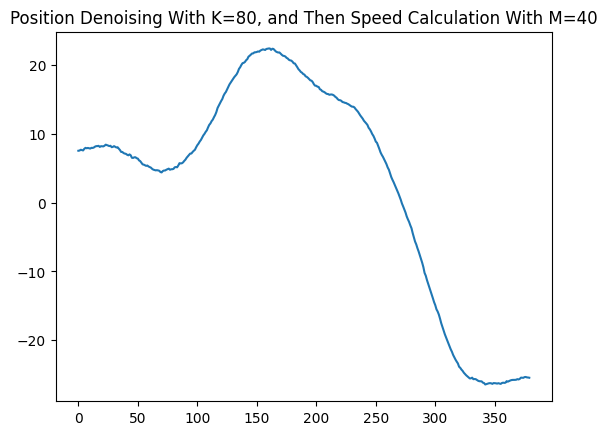

In [10]:
KsMs = [(1, 1), (5, 5), (10, 5), (10, 10), (15, 15), (20, 20), (40, 50), (40, 80), (80, 40)]


for K, M in KsMs:
    impulse_response = np.ones(shape=K+1)
    cleaned_position = (1 / (K + 1)) * np.convolve(gpsposition, impulse_response, mode="valid")

    impulse_response = np.zeros(shape=M+1)
    impulse_response[0] = 1
    impulse_response[M] = -1

    yy = (1/M) * np.convolve(cleaned_position, impulse_response, mode="valid")

    plt.title(f"Position Denoising With K={K}, and Then Speed Calculation With M={M}")
    plt.plot(yy)
    plt.show()

<br>

**Please answer <i>all</i> of the following question:** Based on your plot, what is your estimate for the speed of the car in meters/second? When selecting $M$ and $K$, did you select the 'best' values you stated above? If not, why not? 

<br>

<div class="alert alert-block alert-success">
  The maximum is 30m/s, it stopped twice - once regularly, and the other time turned around. Average at around 10m/s.
  Yes, we selected the 'best' values for both K and M for the best combination.
</div>

<br>

What is the overall impulse response of the two cascaded filters that you used? **Use the code block below to compute and plot the cascaded impulse response. Use your plot(s) to answer the question: Is the order of the two filters important for the cascaded impulse response?.**

<br>

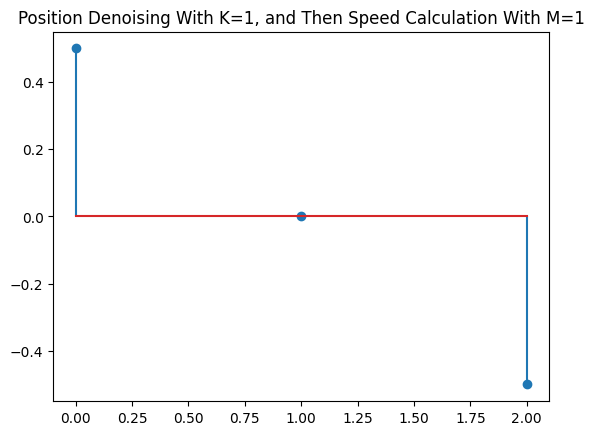

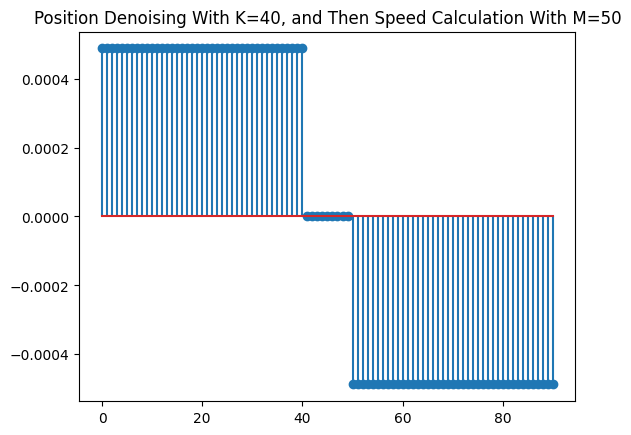

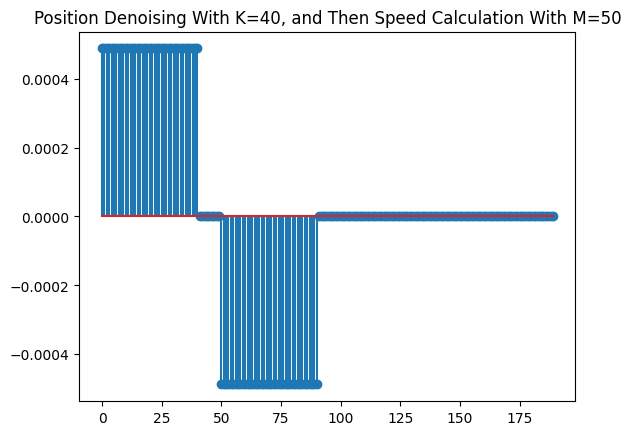

In [14]:
KsMs = [(1, 1), (40, 50)]
unit_impulse = np.zeros(shape=100)
unit_impulse[0] = 1
unit_impulse = [1]

for K, M in KsMs:
    impulse_response = np.zeros(shape=M+1)
    impulse_response[0] = 1
    impulse_response[M] = -1

    yy = (1/M) * np.convolve(unit_impulse, impulse_response, mode="full")

    impulse_response = np.ones(shape=K+1)
    cleaned_speed = (1 / (K + 1)) * np.convolve(yy, impulse_response, mode="full")

    plt.title(f"Position Denoising With K={K}, and Then Speed Calculation With M={M}")
    plt.stem(cleaned_speed)
    plt.show()

KsMs = [(40, 50)]
unit_impulse = np.zeros(shape=100)
unit_impulse[0] = 1

for K, M in KsMs:
    impulse_response = np.zeros(shape=M+1)
    impulse_response[0] = 1
    impulse_response[M] = -1

    yy = (1/M) * np.convolve(unit_impulse, impulse_response, mode="full")

    impulse_response = np.ones(shape=K+1)
    cleaned_speed = (1 / (K + 1)) * np.convolve(yy, impulse_response, mode="full")

    plt.title(f"Position Denoising With K={K}, and Then Speed Calculation With M={M}")
    plt.stem(cleaned_speed)
    plt.show()

<div class="alert alert-block alert-success">
    <b>The order of the filters is NOT important, because convolution is both commutative and associative. <br> So (x[n] * h1[n]) * h2[n] = h1[n] * (x[n] * h2[n])</b>
</div>

<hr style="height:3px; border:none; background-color:blue;">